<a href="https://colab.research.google.com/github/lucascviana/Meus-Projetos/blob/main/Projeto_6_Predicao_da_qualidade_do_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sistema de avaliação dos vinhos a partir de atributos de vinho**

In [ ]:
#importando libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score

In [ ]:
#upload do arquivo

dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
#primeiras visualizações
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#linhas e colunas
dataset.shape

#12 colunas e 1599 linhas

(1599, 12)

In [ ]:
#verificação de valores nulos
dataset.isnull().sum()

#não há valores nulos

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Análise e Visualização dos Dados**

In [ ]:
#estatisticas descritivas do dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


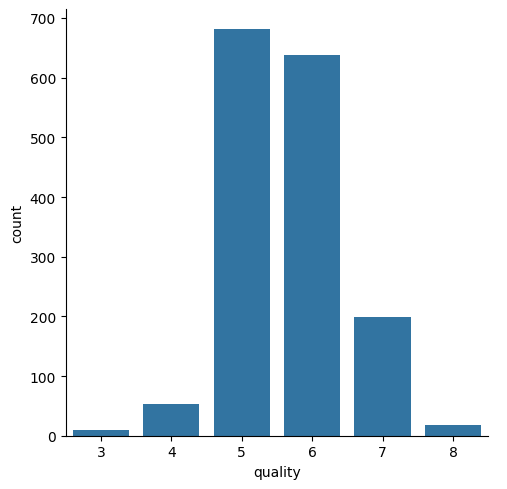

In [ ]:
#visualização da volumetria da quantidade
sns.catplot(x= 'quality', data = dataset, kind = 'count')

#plot categórico em função da qualidade e suas quantidades
#boa parte da qualidade é 5 e 6

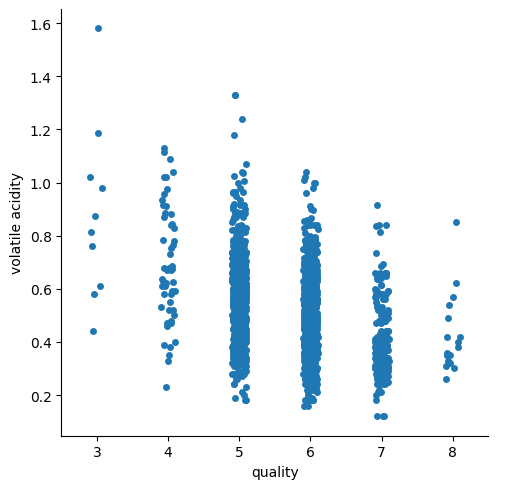

In [ ]:
#visualização da qualidade vs acidez
sns.catplot(x= 'quality', data = dataset, y = 'volatile acidity')

#há um meio termo entre a volatilidade do acido e a qualidade

<Axes: xlabel='quality', ylabel='volatile acidity'>

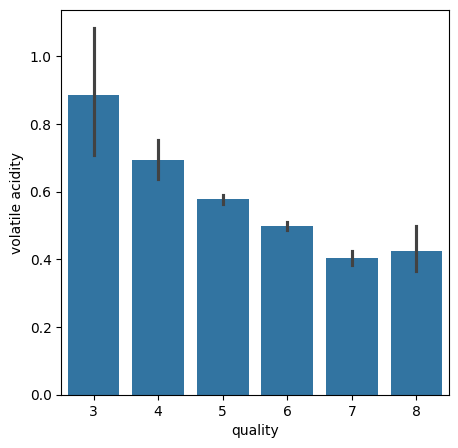

In [ ]:
#volatilidade vs qualidade - forma 2
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = dataset)

##mesma relação com o gráfico anterior - quanto menor a acidez volatil maior a qualidade

<Axes: xlabel='quality', ylabel='citric acid'>

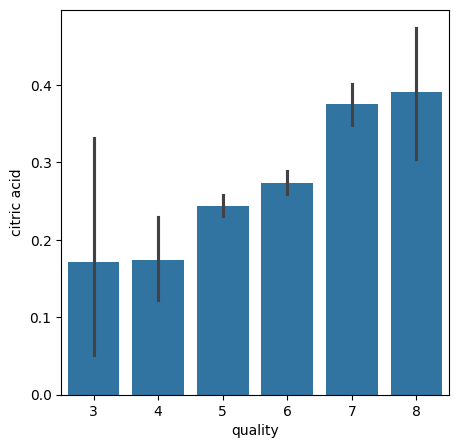

In [ ]:
#acido citrico vs qualidade - forma 2
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'citric acid', data = dataset)

#são comportamentos proporcionais - quanto maior a acidez citrica maior a qualidade do vinho

**Correlação entre a colunas**


In [ ]:
correlation = dataset.corr()

<Axes: >

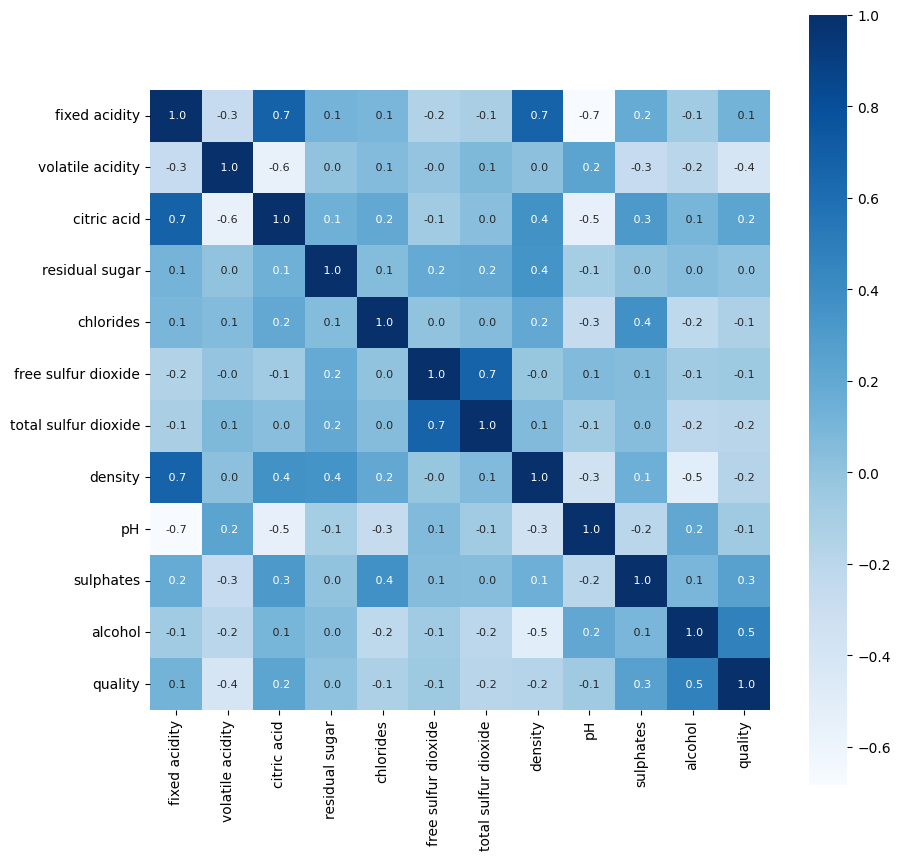

In [ ]:
#visulização da correlação
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = ' .1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues' )

#elementos do gráfico
#correlation = dados
#cbar = cor de escala
#square = formato de quadrado
#fmt = número float
#annot = valores do eixo
#annot_kws = tamanho dos rótulos

**Modelagem dos Dados**


In [ ]:
#separação da coluna de ouput e as features
X = dataset.drop('quality', axis=1) #features

In [ ]:
#binarização do output - transformar em bom ou ruim
Y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
#separação em conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size = 0.2)

In [ ]:
#Verificação dos valores
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599, 11) (1279, 11) (320, 11)
(1599,) (1279,) (320,)


**Treinamento do Modelo - Random Forest Classifier**
Sobre o modelo, ele gera diferentes arvores de decisão com diferentes features e avalia o desempenho

In [ ]:
#instância com modelo
model = RandomForestClassifier()

In [ ]:
#treinamento
model.fit(X_train, Y_train)

RandomForestClassifier()

**Avaliação do Modelo**

In [ ]:
#predição com os valores de treino
X_test_predction = model.predict(X_test)
print(X_test_predction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#verificação do desempenho
test_data_accuracy =accuracy_score(X_test_predction ,Y_test)

In [ ]:
#resultado
print(test_data_accuracy)

#resultado ficou bem bom 93%

0.928125


**Construindo um sistema preditivo de qualidade de vinho**

In [ ]:
#simulação com valores aleatórios do dataset para teste
input_data = (7.3,0.65,0,1.2,0.065, 15.0, 21.0,0.9946,3.39, 0.47,10.0)

#transformar o input em numpy array
input_data_np_array = np.asarray(input_data)

#modelar a tupla para viabilizar uma unica linha
input_data_np_array_reshape = input_data_np_array.reshape(1,-1)



In [ ]:
predicao = model.predict(input_data_np_array_reshape)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#é esperado o valor 1 - o vinho é bom
print(predicao)
#resultado deu certo

In [ ]:
if predicao ==1:
  print('O vinho é bom')
else:
  print('O vinho não é bom')

O vinho é bom


In [ ]:
#11 linhas sem valor
input_data_np_array.shape

(11,)

In [ ]:
#1 linha com 11 valores
input_data_np_array.shape

(1, 11)